# 참고 링크
- https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/h2o.html
- https://inspaceai.github.io/2019/05/15/H2O-AutoML-Start/

```python
# in terminal
pip install requests
pip install tabulate
pip install “colorama>=0.3.8”
pip install future

pip uninstall h2o
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
```

In [1]:
import h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 mins 35 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_WonBeen_nuinj1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.115 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [9]:
insurance_car = h2o.upload_file('../../Data/insurance_car.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [19]:
insurance_car.head()

ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State
1,1,F,522,656,1,0,Married,Car,14749,5,<18,>350,<3,<15k,Fair,IL
2,1,F,691,704,16,0,Married,Car,15389,6,28-34,>350,15-30,15k-25k,Good,NJ
3,1,M,133,691,15,0,Married,Van,9956,3,>40,90-160,15-30,<15k,Good,CT
4,1,M,146,720,9,0,Married,Van,77323,3,18-27,90-160,9-14',>25k,Good,CT
5,1,M,128,771,33,1,Married,Van,14183,4,>40,90-160,>30,<15k,Very Good,WY
6,1,F,144,722,18,1,Married,Truck,12208,8,>40,90-160,15-30,<15k,Good,DE
7,1,F,151,788,31,3,Married,Truck,13957,2,>40,90-160,>30,<15k,Very Good,NJ
8,1,F,88,747,21,1,Single,Car,14200,5,>40,<90,15-30,<15k,Very Good,ME
9,1,F,653,717,34,0,Married,Car,17084,1,>40,>350,>30,15k-25k,Good,CA
10,0,F,120,785,19,1,Married,Truck,6101,1,35-40,90-160,15-30,<15k,Very Good,NJ


In [11]:
insurance_car.shape

(30240, 17)

In [16]:
#factor 형태로 인코딩
insurance_car['target'] = insurance_car['target'].asfactor()  
print(insurance_car['target'].levels()) 

[['0', '1']]


In [12]:
splits = insurance_car.split_frame(ratios=[0.7, 0.15], seed=1)

In [13]:
train = splits[0]   # 학습 데이터 셋
valid = splits[1]   # 검증 데이터 셋
test = splits[2]    # 테스트 데이터 셋

In [14]:
# 각 데이터 셋 행 출력
print(train.nrow)   
print(valid.nrow)
print(test.nrow)

21273
4441
4526


In [21]:
y = 'target'  
x = list(insurance_car.columns) 

In [22]:
x.remove(y)  # 'bad_loan'열 제거
x.remove('ID')  # 필요없는 열 제거

In [23]:
print(x)

['Gender', 'EngineHP', 'credit_history', 'Years_Experience', 'annual_claims', 'Marital_Status', 'Vehical_type', 'Miles_driven_annually', 'size_of_family', 'Age_bucket', 'EngineHP_bucket', 'Years_Experience_bucket', 'Miles_driven_annually_bucket', 'credit_history_bucket', 'State']


# AutoML 빌드하기

In [24]:
from h2o.automl import H2OAutoML

In [25]:
# H2O AutoML 인터페이스
# [max_runtime_secs] AutoML 빌드될 최대 시간 지정
# [max_models] AutoML이 빌드할 최대 모델 개수 지정
aml = H2OAutoML(max_models=10, max_runtime_secs=1000, seed=1)

In [26]:
# [x] predict column
# [y] response column
# [training_frame]  학습 데이터 셋
# [validation_frame] 검증 데이터 셋
aml.train(x=x, y=y, training_frame=train, validation_frame=valid) 

AutoML progress: |█
23:03:32.2: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
23:03:32.30: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%
Failed polling AutoML progress log: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'C:\\Users\\WonBeen\\AppData\\Local\\Temp\\tmpm4zj5jqu.csv'


In [27]:
# 빌드된 AutoML 모델 보여주기
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_1_AutoML_20200902_230331,0.206869,0.454828,0.206869,0.413712,0.318401
StackedEnsemble_BestOfFamily_AutoML_20200902_230331,0.206874,0.454834,0.206874,0.413708,0.318403
StackedEnsemble_AllModels_AutoML_20200902_230331,0.206878,0.454838,0.206878,0.413705,0.318406
GBM_grid__1_AutoML_20200902_230331_model_1,0.207602,0.455634,0.207602,0.413192,0.318721
DeepLearning_1_AutoML_20200902_230331,0.208321,0.456422,0.208321,0.41746,0.318385
GBM_1_AutoML_20200902_230331,0.208695,0.456832,0.208695,0.413134,0.319277
GBM_2_AutoML_20200902_230331,0.209582,0.457802,0.209582,0.413287,0.319786
GBM_5_AutoML_20200902_230331,0.210084,0.458349,0.210084,0.413102,0.320099
GBM_3_AutoML_20200902_230331,0.210728,0.459051,0.210728,0.413374,0.320455
XRT_1_AutoML_20200902_230331,0.21196,0.460391,0.21196,0.41813,0.320088


In [28]:
# 빌드된 AutoML 모델 MOJO 포맷으로 저장
aml.leader.download_mojo(path="./")

'C:\\Users\\WonBeen\\Desktop\\python 교육자료_이원빈\\실습\\AutoML\\GLM_1_AutoML_20200902_230331.zip'

In [29]:
# 빌드된 AutoML 모델 binary 파일로 저장
model_path = h2o.save_model(aml.leader, path="./insurance_car_model_bin")

In [33]:
insurance_car.describe()

Rows:30240
Cols:17




,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State
type,int,enum,enum,int,int,int,int,enum,enum,int,int,enum,enum,enum,enum,enum,enum
mins,1.0,,,80.0,300.0,1.0,0.0,,,5000.0,1.0,,,,,,
mean,15120.5,,,196.60426587301484,685.769775132281,13.255720899470797,1.1384589947089958,,,17422.938938872718,4.5212962962963354,,,,,,
maxs,30240.0,,,1005.0,850.0,40.0,4.0,,,99943.0,8.0,,,,,,
sigma,8729.68040652119,,,132.34696050638905,102.45430747908206,9.890246463450078,1.0829126913674494,,,17483.782840434476,2.2865311390392495,,,,,,
zeros,0,,,0,0,0,10334,,,0,0,,,,,,
missing,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0
0,1.0,1,F,522.0,656.0,1.0,0.0,Married,Car,14749.0,5.0,<18,>350,<3,<15k,Fair,IL
1,2.0,1,F,691.0,704.0,16.0,0.0,Married,Car,15389.0,6.0,28-34,>350,15-30,15k-25k,Good,NJ
2,3.0,1,M,133.0,691.0,15.0,0.0,Married,Van,9956.0,3.0,>40,90-160,15-30,<15k,Good,CT


<br>

- - -

# 예측 모델 만들기

## 데이터 나누기

In [34]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [35]:
train_df, valid_df, test_df = insurance_car.split_frame(ratios=[0.6,0.2], seed=2020)
target = "target"
train_df[target] = train_df[target].asfactor()
valid_df[target] = valid_df[target].asfactor()
test_df[target] = test_df[target].asfactor()
print("학습, 검증, 테스트 데이터셋의 수 : ", train_df.shape[0], valid_df.shape[0], test_df.shape[0])

학습, 검증, 테스트 데이터셋의 수 :  18197 6083 5960


## GBM(Gradient Boosting Algorithm) 모델로 학습하기

In [37]:
features = [f for f in insurance_car.columns if f not in ['ID', 'State']]

In [38]:
predictors = features
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=target, training_frame=train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


## 모델 평가하기

In [39]:
gbm.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,16662.0,5.0,5.0,5.0,9.0,32.0,21.86


- 검증 데이터셋에 대한 모델의 성능 확인

In [40]:
print(gbm.model_performance(valid_df))


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.20489847329954294
RMSE: 0.4526571255371365
LogLoss: 0.6001881115400619
Mean Per-Class Error: 0.48826237054085153
AUC: 0.506338251048452
AUCPR: 0.7184669403726469
Gini: 0.012676502096903963

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29114538697657627: 


,,0,1,Error,Rate
0,0,1.0,1737.0,0.9994,(1737.0/1738.0)
1,1,0.0,4345.0,0.0,(0.0/4345.0)
2,Total,1.0,6082.0,0.2855,(1737.0/6083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.291145,0.833413,398.0
1,max f2,0.291145,0.925965,398.0
2,max f0point5,0.551166,0.757820,371.0
3,max accuracy,0.291145,0.714450,398.0
4,max precision,0.854040,1.000000,0.0
5,max recall,0.291145,1.000000,398.0
6,max specificity,0.854040,1.000000,0.0
7,max absolute_mcc,0.572919,0.027061,362.0
8,max min_per_class_accuracy,0.708194,0.501151,181.0
9,max mean_per_class_accuracy,0.696938,0.511738,219.0



Gains/Lift Table: Avg response rate: 71.43 %, avg score: 70.68 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010028,0.790614,1.032787,1.032787,0.737705,0.806860,0.737705,0.806860,0.010357,0.010357,3.278689,3.278689,0.001151
1,2,0.020056,0.777072,1.147541,1.090164,0.819672,0.782714,0.778689,0.794787,0.011507,0.021864,14.754098,9.016393,0.006329
2,3,0.030084,0.768162,0.963934,1.048087,0.688525,0.772372,0.748634,0.787315,0.009666,0.031530,-3.606557,4.808743,0.005063
3,4,0.040112,0.763106,1.009836,1.038525,0.721311,0.765480,0.741803,0.781857,0.010127,0.041657,0.983607,3.852459,0.005409
4,5,0.050304,0.758012,1.038710,1.038562,0.741935,0.760479,0.741830,0.777525,0.010587,0.052244,3.870968,3.856209,0.006789
5,6,0.100115,0.743074,0.988779,1.013793,0.706271,0.749510,0.724138,0.763586,0.049252,0.101496,-1.122112,1.379310,0.004833
6,7,0.150255,0.734703,0.945574,0.991028,0.675410,0.738601,0.707877,0.755249,0.047411,0.148907,-5.442623,-0.897155,-0.004718
7,8,0.200066,0.728847,1.030363,1.000822,0.735974,0.731534,0.714873,0.749344,0.051323,0.200230,3.036304,0.082169,0.000575
8,9,0.300016,0.720792,1.013158,1.004932,0.723684,0.724589,0.717808,0.741097,0.101266,0.301496,1.315789,0.493151,0.005178
9,10,0.399967,0.714363,1.001645,1.004110,0.715461,0.717479,0.717222,0.735195,0.100115,0.401611,0.164474,0.411015,0.005754


- 모델에 들어가는 변수들의 중요도 플롯

In [42]:
import matplotlib.pyplot as plt

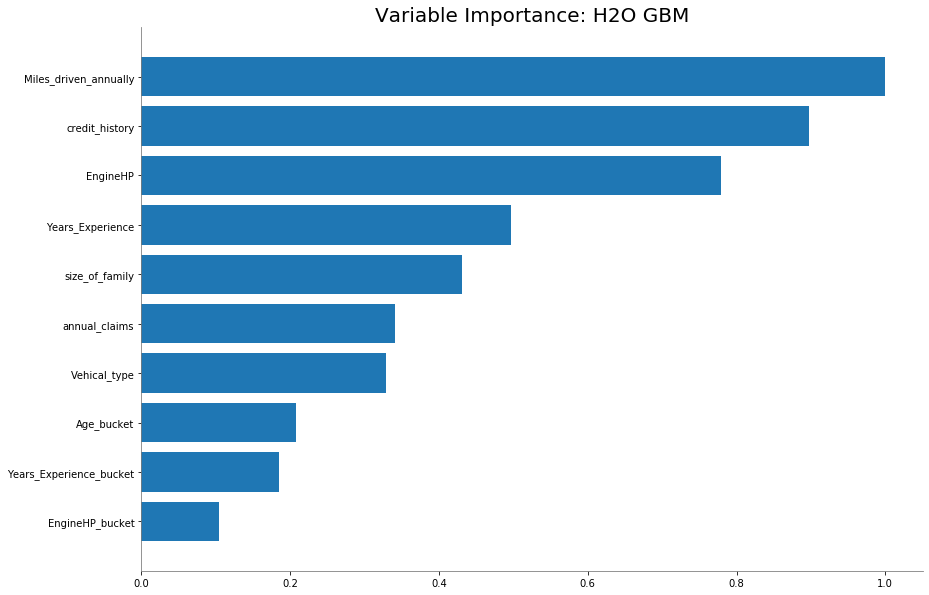

In [43]:
gbm.varimp_plot()

## 예측하기

In [45]:
import numpy as np

In [46]:
pred_val = list(gbm.predict(test_df[predictors])[0])
true_val = list(test_df[target])
prediction_acc = np.mean(pred_val == true_val)
print("Prediction accuracy: ", prediction_acc)

gbm prediction progress: |████████████████████████████████████████████████| 100%
Prediction accuracy:  1.0


- 정확도는 1입니다(100 % 정확하게 예측 된 값).

In [50]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))